In [1]:
from lasagne import objectives
from lasagne import nonlinearities
from lasagne import updates
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

In [2]:
import os
import pandas as pd
import cv2

In [3]:
# Creamos la función para abrir el set de imágenes (tienen que llamarse "clase"_"algo") y lo guardarlo como "faces.csv"

In [4]:
def images_to_file(path_to_photos):
    """ load images from folder and write a csv and return 
    a pd dataframe with X : Images and y:labels"""
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../faces.csv')
    
    return df_out

In [5]:
images_to_file("../dataset IPDI 256/")

(array([0, 0, 0, ..., 2, 2, 2], dtype=int64), Index(['angry', 'happy', 'sad'], dtype='object'))


,Image,Model,Model_enc
angry_ (1),123 129 128 123 121 121 126 133 134 129 125 13...,angry,0
angry_ (10),128 4 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,angry,0
angry_ (100),55 0 1 3 0 7 126 226 245 236 160 41 0 0 0 0 0 ...,angry,0
angry_ (1000),27 0 0 0 0 0 59 140 202 154 74 19 0 0 0 0 0 0 ...,angry,0
angry_ (1001),27 0 0 0 0 0 51 149 227 161 75 24 0 0 0 0 0 0 ...,angry,0
angry_ (1002),32 1 0 0 0 0 42 130 209 166 84 32 1 0 0 0 0 0 ...,angry,0
angry_ (1003),19 0 0 0 0 0 54 143 228 162 70 16 0 0 0 0 0 0 ...,angry,0
angry_ (1004),21 0 48 136 237 220 111 46 5 0 1 1 0 0 0 0 0 0...,angry,0
angry_ (1005),9 0 67 163 245 200 94 41 5 1 0 0 0 0 0 0 0 0 0...,angry,0
angry_ (1006),10 0 63 161 245 202 95 39 6 1 2 1 0 0 0 0 0 0 ...,angry,0


In [5]:
import numpy as np
from sklearn.utils import shuffle

In [6]:
def load(images_dir="../dataset IPDI/", face_net_fn = '../faces.csv'):
    """Load images and target class for Angry, Happy and Sad faces."""
    
    if os.path.exists(face_net_fn):
        df = pd.read_csv(face_net_fn)
    else:
        df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

In [7]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

In [8]:
layers_0 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 256, 256)}),

    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 64, 'filter_size': 11}),
    (Conv2DLayer, {'num_filters': 64, 'filter_size': 5}),
    
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # third stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3}),
    
    (MaxPool2DLayer, {'pool_size': 2}),

    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),

    # the output layer
    (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
]


In [9]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=layers_0,
        update=nesterov_momentum,
        update_learning_rate=0.008,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=256),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

In [10]:
# Definir set de entrenamiento

In [ ]:
from sklearn.cross_validation import train_test_split
x, y = load()
x = x.reshape(-1, 1, 256, 256)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape)

In [13]:
# Crear y entrenar red

In [4]:
net = create_net(20)
net.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [23]:
# Mostrar errores de clasif. durante entrenamiento y post-entrenamiento

In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [21]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       347
          1       1.00      1.00      1.00       511
          2       1.00      0.97      0.98       213

avg / total       0.99      0.99      0.99      1071



In [22]:
accuracy_score(y_test, net.predict(X_test))

0.99346405228758172

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

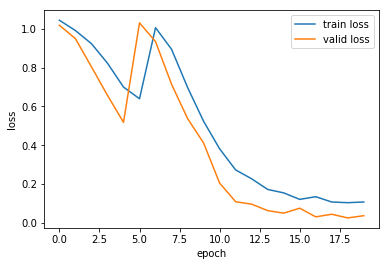

In [24]:
visualize.plot_loss(net)

In [25]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))
    
    return ax


Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.03286385  0.          0.96713615]]
[[347   0   0]
 [  0 511   0]
 [  7   0 206]]


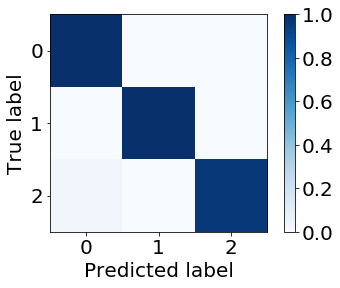

In [26]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

In [27]:
# Guardar red

In [13]:
import pickle

In [29]:
with open('../data/face_classifier_ck_256.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [30]:
# Cargar red

In [14]:
net2 = None
with open('../data/face_classifier_ck_256.pickle', 'rb') as f:
       net2 = pickle.load(f)

In [35]:
# Mostrar datos de red cargada

In [15]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net2)

NameError: name 'net' is not defined

In [33]:
# Cargar imagen

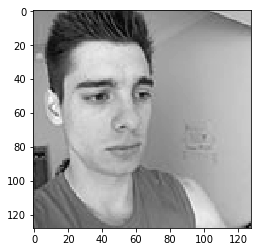

In [25]:
my_image = cv2.imread("../sad_ (20).jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [40]:
# Clasificar imagen

In [26]:
net2.predict(X)

array([2], dtype=int64)

In [27]:
proba = net2.predict_proba(X)
proba, proba.sum()

(array([[ 0.1087309 ,  0.06000444,  0.83126466]]), 1.0)